<a href="https://colab.research.google.com/github/massirism/ML-UNS/blob/main/Ascombe_Massiris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

#mean, variance and correlation coefficient
anscombe = sns.load_dataset('anscombe')  
df = anscombe.groupby('dataset')
mean_var = pd.concat([df.mean(), df.var()], keys=['mean', 'variance'])
corr = pd.concat([df.corr()], keys=['correlation'])
print(mean_var)
print(corr)

#linear regression
data_dict = dict(list(df))
array_x, array_y = {}, {}
for key, value in data_dict.items():
    array_x[key] = value['x'].values
    array_y[key] = value['y'].values
for key in array_x.keys():
    x = sm.add_constant(array_x[key])
    y = array_y[key]
    est = sm.OLS(y, x).fit()
    params = est.params
    print(key, ': beta0 =', params[0], 'beta1 =', params[1])

                     x         y
         dataset                
mean     I         9.0  7.500909
         II        9.0  7.500909
         III       9.0  7.500000
         IV        9.0  7.500909
variance I        11.0  4.127269
         II       11.0  4.127629
         III      11.0  4.122620
         IV       11.0  4.123249
                              x         y
            dataset                      
correlation I       x  1.000000  0.816421
                    y  0.816421  1.000000
            II      x  1.000000  0.816237
                    y  0.816237  1.000000
            III     x  1.000000  0.816287
                    y  0.816287  1.000000
            IV      x  1.000000  0.816521
                    y  0.816521  1.000000
I : beta0 = 3.0000909090909076 beta1 = 0.5000909090909093
II : beta0 = 3.0009090909090905 beta1 = 0.5000000000000001
III : beta0 = 3.0024545454545444 beta1 = 0.4997272727272729
IV : beta0 = 3.001727272727269 beta1 = 0.49990909090909097


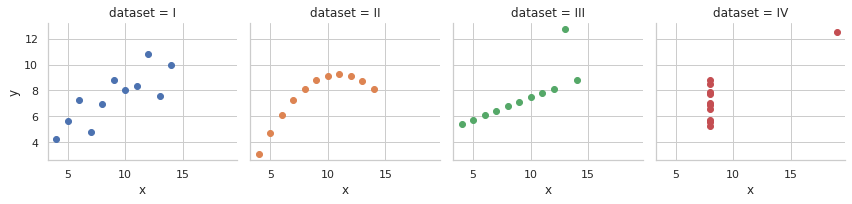

In [31]:
sns.set(style='whitegrid')
g = sns.FacetGrid(anscombe, col="dataset", hue="dataset")
g.map(plt.scatter, 'x', 'y')
plt.show()

Viendo los datos simplemente de la tabla no es posible sacar una conclusión sobre cual sea el dataset correcto, como bien dijo el profesor todos son estadísticamente iguales, así que para diferenciarlos los grafiqué.

Al graficarlos se pyuede ver que los datasets 2 y 4 tienen un comportamiento no lineal, lo cual no nos conviene, entonces utilizaría los datasets 1 y 3. Sobre todo el 3 aún si tiene un dato separado del grupo, porque no será ponderante.


Miguel Massiris F.
